# Part 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

X, y = mnist["data"], mnist["target"]

X = X.to_numpy()
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Perform a grid search to find the best hyperparameters for the model using n_neighbors and weights.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
param_grid = [
    {"n_neighbors" : [3,5,10,20,30,50]},
    {"weights" : ["uniform", "distance"]}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score= True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 10, 20, 30, 50]},
                         {'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [8]:
best_knn = grid_search.best_estimator_

best_knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [13]:
grid_search.best_params_

{'weights': 'distance'}

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(best_knn, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9688 , 0.96795, 0.96905])

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(best_knn, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5881,    3,    5,    0,    1,    5,   20,    1,    3,    4],
       [   2, 6701,   11,    3,    3,    1,    3,   11,    2,    5],
       [  46,   54, 5691,   20,    9,    4,   11,   92,   21,   10],
       [   7,   11,   33, 5899,    1,   65,    6,   43,   39,   27],
       [   3,   51,    0,    1, 5622,    0,   14,   13,    2,  136],
       [  13,   10,    4,   60,    6, 5217,   61,    7,   16,   27],
       [  20,   13,    1,    0,    5,   25, 5851,    0,    3,    0],
       [   3,   65,   12,    3,   13,    2,    0, 6093,    4,   70],
       [  18,   82,   10,   73,   29,   87,   27,   16, 5431,   78],
       [  15,   10,    5,   39,   44,   11,    5,   77,   13, 5730]],
      dtype=int64)

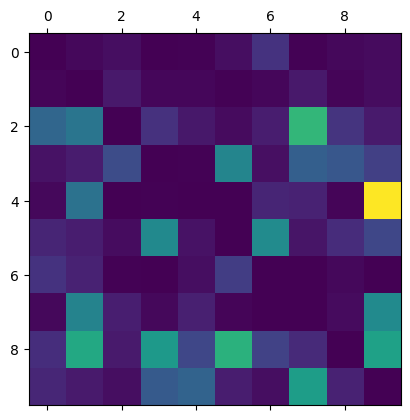

In [11]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx)

The model commonly confuses 7 and 2, 9 and 4, and 8 and 5. 